# Test 01

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
DATA_PATH = '../../data/test02'
VRT_PATH = os.path.join(DATA_PATH,'10','vertices')

## Sanity check

Just checking the the field profile is correct

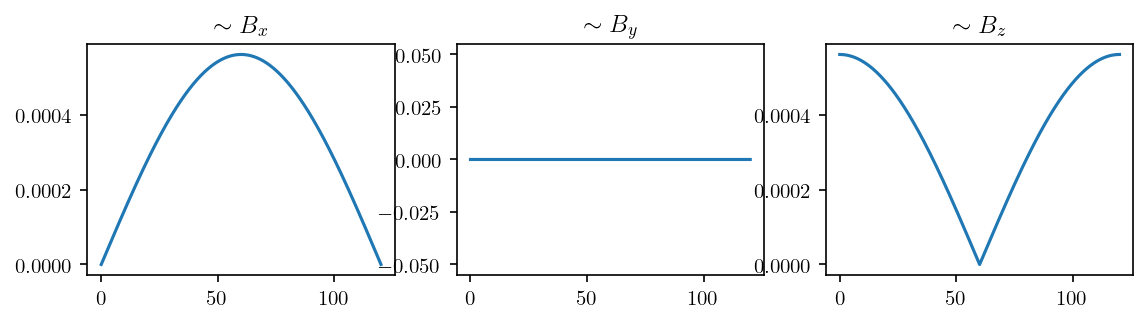

In [14]:
ctrj_raw = pd.read_csv(os.path.join(DATA_PATH,'10','trj/trj10.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()

## Vertex counting

In [15]:
def do_vertices_shit(data_path):
    vrt_path = os.path.join(data_path,"vertices/")
    vertices = aux.vrt_dict(vrt_path)
    counts = aux.vrt_counts(vertices)
    vrt_ts = aux.vrt_averages(counts,params["framespersec"])
    types = vrt_ts.columns.to_list()[1:]
    t = vrt_ts["time"].to_numpy()
    print(types)
    vrt_counts = vrt_ts[types].to_numpy()
    return t, vrt_counts

In [16]:
t,vrt_counts = do_vertices_shit(os.path.join(DATA_PATH,'10'))
types = ['I','II','III','IV','V','VI']

['1.0', '2.0', '3.0', '4.0', '5.0', '6.0']


/home/frieren/.virtualenvs/globalenv/lib/python3.12/site-packages/pandas/core/construction.py:632: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(data, copy=copy)


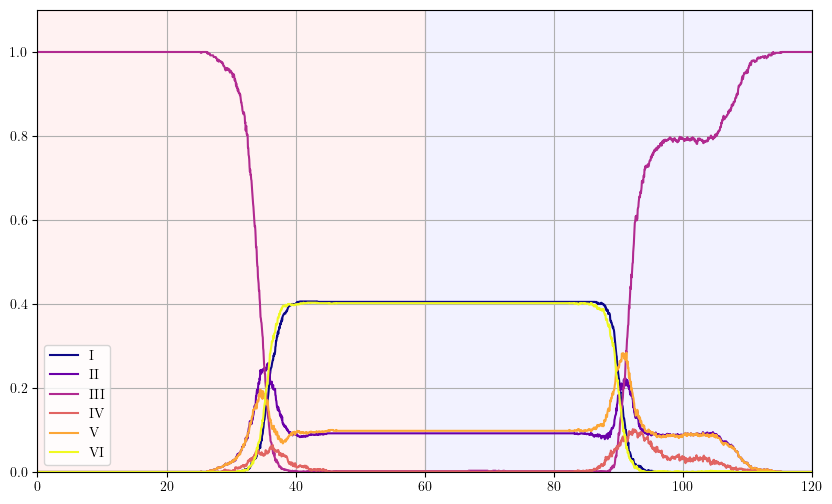

In [17]:
cmap = plt.get_cmap('plasma')
colors = [cmap(i/5) for i in range(6)]

fig, ax = plt.subplots(figsize=(10,6))
for i, (tp,ts) in enumerate(zip(types,vrt_counts.T)):
    ax.plot(t, ts, color=colors[i], label=tp)
ax.set_ylim(0,1.1)
ax.set_xlim(0,120)
ax.axvspan(0,60,alpha=0.05, color='red')
ax.axvspan(60,120,alpha=0.05, color='blue')
ax.axvspan(120,180,alpha=0.05, color='green')
ax.legend()
ax.grid()
plt.show()